# Pump it Up: Data Mining the Water Table

This notebook is dedicated to **Drivendata Competition** [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/).

**Objective:**
<br>
To predict which pumps are __functional__, __need some reparis__, and __not working at all__.
<br>

From above objective, the problem is to predict/classify pumps condition into one of those classes. In this notebook, the workflows/outline are below:

1. Import The Dataset
2. Exploratory Analysis
3. Build The Model
4. Training
5. Test The Model

---

## Import The Dataset

In [1]:
# import necesary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from IPython.display import display

# from sklearn.preprocessing import ...
# from sklearn.model_selection import ...

Import the dataset ..

In [2]:
# load the data
raw_train = pd.read_csv('dataset/train.csv', header="infer")
raw_test = pd.read_csv('dataset/test.csv', header="infer")
label_train = pd.read_csv('dataset/train_label.csv', header="infer")

In [3]:
print('training set: ')
display(raw_train.head(3))
print('training label: ')
display(label_train.head(3))
print('testing set: ')
display(raw_test.head(3))

training set: 


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


training label: 


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


testing set: 


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


## Exploratory Analysis

- [x] Number of rows of dataset
- [x] Number of features
- [ ] Determine numerical and categorical features
- [ ] Feature Engineering
- [ ] Create Analytical Based Table (ABT)

The goal is **to predict operating conditionof a waterpoint for each record in the dataset**. The dataset comprises below features:

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint



In [4]:
num_features = raw_train.shape[1]
num_train = raw_train.shape[0]
num_test = raw_test.shape[0]

print('Number of features: {}'.format(num_features))
print('Number of rows in training set: {}'.format(num_train))
print('Number of rows in test set: {}'.format(num_test))

Number of features: 40
Number of rows in training set: 59400
Number of rows in test set: 14850


In [5]:
num_cateogric_feat = raw_train.loc[ :, raw_train.dtypes=='object' ].shape[1]
categoric_feat = [feature for feature in raw_train.loc[:, raw_train.dtypes=='object'].columns]
num_numeric_feat = raw_train.loc[ :, raw_train.dtypes!='object' ].shape[1]
numeric_feat = [ feature for feature in raw_train.loc[:, raw_train.dtypes!='object'].columns]

print('The dataset contains {} categorical features, which are:\n{}'.format(num_cateogric_feat, categoric_feat))
print('')
print('The dataset contains {} numerical features, whic are:\n{}'.format(num_numeric_feat, numeric_feat))

The dataset contains 30 categorical features, which are:
['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']

The dataset contains 10 numerical features, whic are:
['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


Categorical features:

In [6]:
display(raw_train[categoric_feat].head())
display(raw_train[categoric_feat].tail())

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,2011-04-11,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,2011-03-23,World Bank,World,Kwa Mzee Lugawa,Wami / Ruvu,Kikatanyemba,Morogoro,Morogoro Rural,Ngerengere,True,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


Create a dictionary with the `key` is the `feature` and the `value` is the number of unique value in the categorical features.

In [7]:
# TODO: handle missing value `NaN` in categorical features

In [8]:
unique_categorcal_value = dict()
for feature in categoric_feat:
    set_value = set(raw_train[feature])
    unique_categorcal_value[feature] = len(set_value)

In [9]:
print(unique_categorcal_value)

{'date_recorded': 356, 'funder': 1898, 'installer': 2146, 'wpt_name': 37400, 'basin': 9, 'subvillage': 19288, 'region': 21, 'lga': 125, 'ward': 2092, 'public_meeting': 3, 'recorded_by': 1, 'scheme_management': 13, 'scheme_name': 2697, 'permit': 3, 'extraction_type': 18, 'extraction_type_group': 13, 'extraction_type_class': 7, 'management': 12, 'management_group': 5, 'payment': 7, 'payment_type': 7, 'water_quality': 8, 'quality_group': 6, 'quantity': 5, 'quantity_group': 5, 'source': 10, 'source_type': 7, 'source_class': 3, 'waterpoint_type': 7, 'waterpoint_type_group': 6}


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

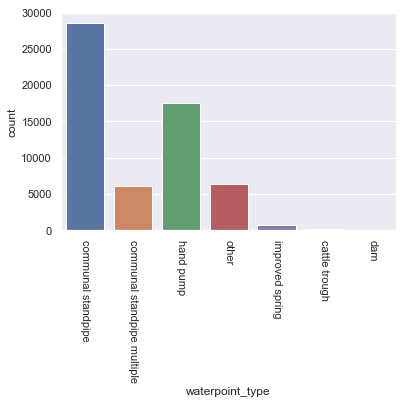

In [10]:
sn.set(style='darkgrid')
sn.countplot(x='waterpoint_type', data=raw_train)
plt.xticks(rotation=-90)

## Build The Model

- [ ] Description of some of models candidates, along with its pros and cons (min. 5 models to consider)
- [ ] Choose 3 of them based on pros/cons and the most suited model based on the data characteristics
- [ ] Code the model
- [ ] Create the metrics that best suited with respect to the problem
- [ ] Create the whole general Pipeline for training and evaluate the model